
El valor medio del registro 1 de x(t) es 0.1774 y su desviación 1.4406 

El valor medio del registro 1 de y(t) es -1.0164 y su desviación 0.2174 



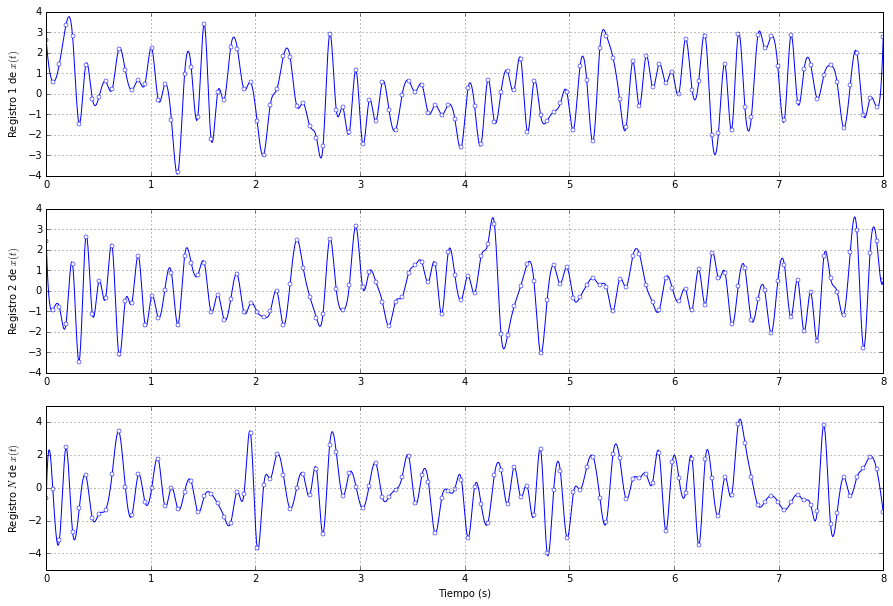

A continuación se calcularán las medias y varianzas para dos instantes y diferentes registros...

Se selecciona t1 =  2.6667 y t2 = 4.0039 s

La media E[x(t)] en t1 es -0.0446 y en t2 es 0.0792 

La media E[y(t)] en t1 es -1.0276 y en t2 es -0.9957 

La media E[x(t)·x(t+tau)] en t1 es 0.1034 y en t2 es 0.044 

La media E[y(t)·y(t+tau)] en t1 es 1.0242 y en t2 es 0.9622 

Se comprueba que el proceso es débilmente ergódico. Por haber sido generado con una distribución normal se sabe que es en realidad fuertemente ergódico.


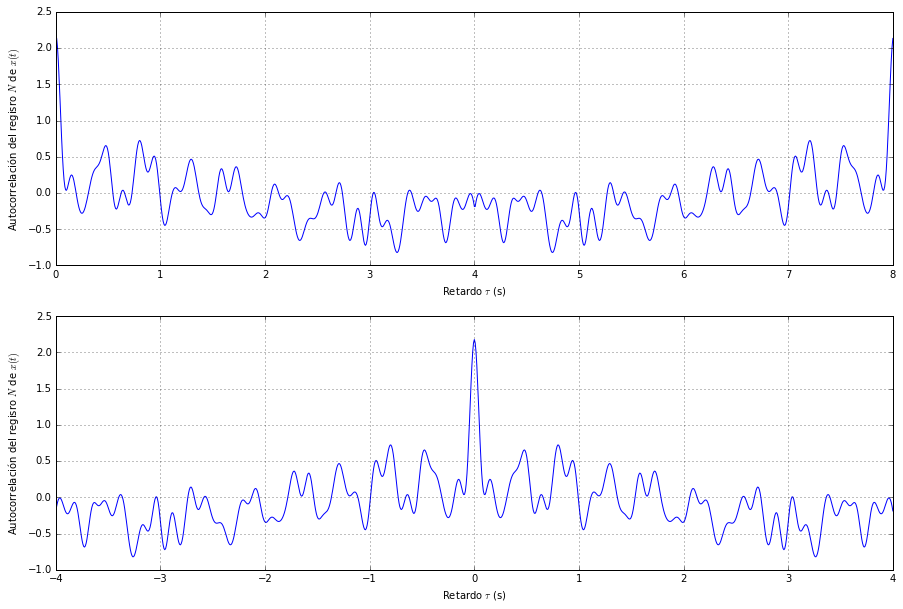

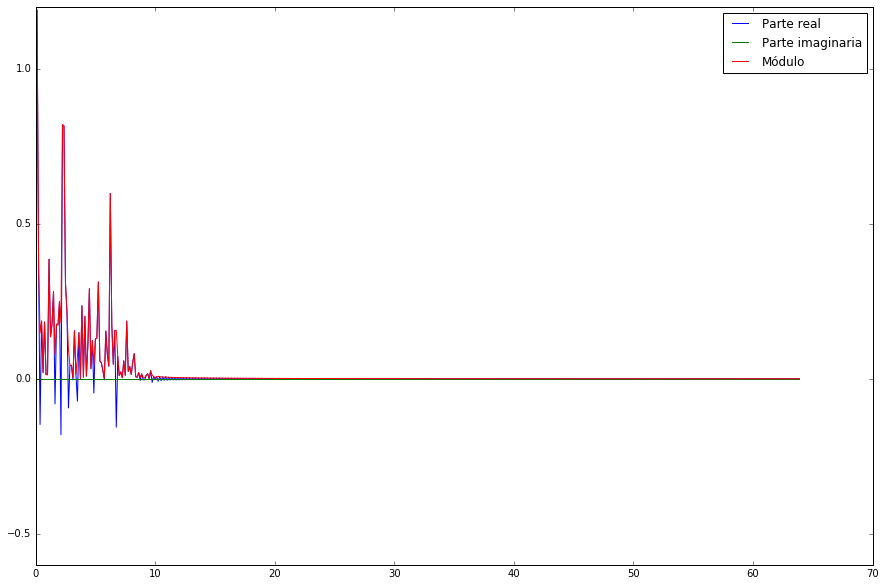

Integral de Sx(w)= (2.17964116789+8.22671211292e-16j) 



In [4]:
import random as rnd
import numpy as np
from matplotlib import pyplot as plt
from scipy import signal
from scipy.interpolate import interp1d

%matplotlib inline

plt.close("all")

redn = lambda x: round(x,4)

NN = 2**7 # número de puntos tomados aleatoriamente
NP = 2**10 # número de puntos para muestrear
NP2 = NP/2 # la mitad del número de puntos muestreados 
NR = NN # número de registros
t0 = 0.0 
tf = 8.0

t = np.linspace(t0,tf,NP,endpoint=True) # vector de tiempos de muestreo
tn = np.linspace(t0,tf,NN,endpoint=True) # vector de tiempos de los puntos tomados aleatoriamente

mux = 0.0 # media del proceso x
sgx = 1.5  # sigma del proceso x

muy = -1.0
sgy = 0.25

xxn = []  
yyn = []
xx = [] # proceso x
yy = [] # proceso y

for j in range(0,NR):
	np.random.seed(j)
	xxn.append(np.random.normal(mux,sgx,(NN,1))) # tomo NN puntos aleatoriamente
	f = interp1d(tn,xxn[j].transpose(),kind='cubic') # interpolo para tener un buen muestreo
	xx.append(f(t)[0]) 
	del f
	yyn.append(np.random.normal(muy,sgy,(NN,1)))
	f = interp1d(tn,yyn[j].transpose(),kind='cubic')
	yy.append(f(t)[0])
	del f
	

print "\nEl valor medio del registro 1 de x(t) es", redn(np.mean(xx[0])),u"y su desviación", redn(np.sqrt(np.var(xx[0]))),"\n"
print "El valor medio del registro 1 de y(t) es", redn(np.mean(yy[0])),u"y su desviación", redn(np.sqrt(np.var(yy[0]))),"\n"

plt.rcParams['figure.figsize'] = [15, 10]

plt.figure(1)
plt.subplot(3,1,1)
plt.plot(t,xx[0],'b',tn,xxn[0],'wo',markersize=4,markeredgecolor='blue')
plt.grid(True)
plt.ylabel(r'Registro 1 de $x(t)$')

plt.subplot(3,1,2)
plt.plot(t,xx[1],'b',tn,xxn[1],'wo',markersize=4,markeredgecolor='blue')
plt.grid(True)
plt.ylabel(r'Registro 2 de $x(t)$')

plt.subplot(3,1,3)
plt.plot(t,xx[2],'b',tn,xxn[2],'wo',markersize=4,markeredgecolor='blue')
plt.grid(True)
plt.ylabel(r'Registro $N$ de $x(t)$')
plt.xlabel(r'Tiempo (s)')

plt.show()

print u"A continuación se calcularán las medias y varianzas para dos instantes y diferentes registros...\n"
jt1 = int(NP/3.) # para comprobar la primera media
jt2 = int(NP/2.) # para comprobar la segunda media
tau = int(NP/10.) # desplazamiento
print "Se selecciona t1 = ",redn(t[jt1]),"y t2 =",redn(t[jt2]),"s\n"

sum_mx1 = 0.0
sum_mx2 = 0.0
sum_my1 = 0.0
sum_my2 = 0.0
sum_corx1 = 0.0
sum_corx2 = 0.0
sum_cory1 = 0.0
sum_cory2 = 0.0
for j in range(0,NR):
	sum_mx1 = sum_mx1 + xx[j].item(jt1)
	sum_mx2 = sum_mx2 + xx[j].item(jt2)
	sum_my1 = sum_my1 + yy[j].item(jt1)
	sum_my2 = sum_my2 + yy[j].item(jt2)
	sum_corx1 = sum_corx1 + xx[j].item(jt1)*xx[j].item(jt1+tau)
	sum_corx2 = sum_corx2 + xx[j].item(jt2)*xx[j].item(jt2+tau)
	sum_cory1 = sum_cory1 + yy[j].item(jt1)*yy[j].item(jt1+tau)
	sum_cory2 = sum_cory2 + yy[j].item(jt2)*yy[j].item(jt2+tau)

print "La media E[x(t)] en t1 es",redn(sum_mx1/NR),"y en t2 es",redn(sum_mx2/NR),"\n"	
print "La media E[y(t)] en t1 es",redn(sum_my1/NR),"y en t2 es",redn(sum_my2/NR),"\n"
print u"La media E[x(t)·x(t+tau)] en t1 es",redn(sum_corx1/NR),"y en t2 es",redn(sum_corx2/NR),"\n"	
print u"La media E[y(t)·y(t+tau)] en t1 es",redn(sum_cory1/NR),"y en t2 es",redn(sum_cory2/NR),"\n"
print u"Se comprueba que el proceso es débilmente ergódico. Por haber sido generado con una distribución normal se sabe que es en realidad fuertemente ergódico."

#### A continuación defino una onda rectangular 
#a = []
#for j in range(0,NP):
#	if (t[j]>=tf/4.)&(t[j]<=3*tf/4.):
#		a.append(1.)
#	else:
#		a.append(0.)
#xr = np.array(a)
		

# Cálculo de la función de autocorrelación 

xr = xx[0] # tomo un registro cualquiera del proceso porque es ergódico
xs = xx[1] # otra 
#### A continuación algunas señales para probar
#xr = np.sin(2*np.pi*t)
#xr = signal.sawtooth(1*np.pi * t)
#xr = signal.square(1*np.pi * t)
#xr = np.exp(-1*t)
#xr = np.sin(2*np.pi*t) + np.sin(5*np.pi*t)
#xr = np.sin(2*np.pi*t)/(t**2+1)

#### Cálculo de la función de autocorrelación
wv = []
ts = (tf-t0)/NP
for j in range(0,NP2):
	wn = 0
	for k in range(1,NP2):
		wn = wn + ts*(xr.item(k-1)*xr.item(k-1+j)+xr.item(k)*xr.item(k+j))/2
	wv.append(wn/t[NP2-1])

tau = np.linspace(0,tf,NP-1,endpoint=True)
auto = list(wv)
auto2plot = list(wv)
auto2plot.reverse()
wv.pop(0)
auto2plot.extend(wv)
wv.reverse()
auto.extend(wv)

tau2plot = np.linspace(-tf/2,tf/2,NP-1,endpoint=True)

tau3 = np.linspace(-tf/2,tf/2,NP,endpoint=True)
auto_xx = np.correlate(xr,xr,mode='same')/NP
auto_xx = auto_xx/(1-abs(tau3)/tf)

plt.figure(2)
plt.subplot(2,1,1)
plt.plot(tau,auto)
plt.grid(True)
plt.ylabel(u'Autocorrelación del regisro $N$ de $x(t)$')
plt.xlabel(r'Retardo $\tau$ (s)')
plt.subplot(2,1,2)
plt.plot(tau2plot,auto2plot)
plt.grid(True)
plt.ylabel(u'Autocorrelación del regisro $N$ de $x(t)$')
plt.xlabel(r'Retardo $\tau$ (s)')
plt.show()
#plt.savefig('autocorrelacion.pdf', format='pdf')

# Transformada de Fourier de la función de autocorrelación
ts = tau[1]-tau[0]
Fs = 1/ts

X = np.fft.fft(auto)*ts
freq = (Fs/2)*np.linspace(-1,1,NP,endpoint=True)
f = (Fs/2)*np.linspace(0,1,NP2,endpoint=True)
FFT = X[0:NP/2]
plt.figure(3)
plt.plot(f,FFT.real,label="Parte real")
plt.plot(f,FFT.imag,label="Parte imaginaria")
plt.plot(f,np.abs(FFT),label=u"Módulo")
plt.legend(loc='upper right')
plt.show()

# Integral de Sx(w) en w
wn = 0
incf = (f[1]-f[0])
for j in range(1,NP/2):
	wn = wn + incf*(FFT[j-1]+FFT[j])/2

print "Integral de Sx(w)=",2*wn,"\n"
